In [2]:
from tensorflow.keras.datasets import cifar10
import numpy as np

(x_train, _), (x_test, _) = cifar10.load_data()



In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 32, 32, 3))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 32, 32, 3))  # adapt this if using `channels_first` image data format


In [ ]:
x_train[0]

In [15]:

noise_factor = 0.2
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [29]:
x_train[0].shape

(32, 32, 3)

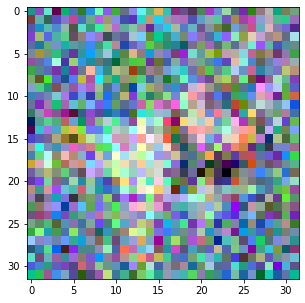

In [16]:
    import matplotlib.pyplot as plt
    plt.figure(figsize=(5, 5))
    plt.imshow(x_test_noisy[10])
    

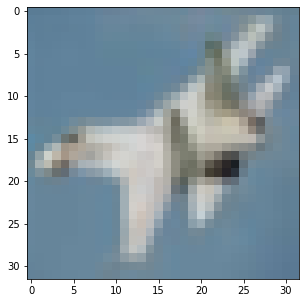

In [6]:
  plt.figure(figsize=(5, 5))
plt.imshow(x_test[10])

In [23]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, MaxPool2D, BatchNormalization, Dropout, LeakyReLU, Conv2DTranspose, add
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

In [25]:
input_img = Input(shape=(32, 32, 3))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = BatchNormalization()(x)
x = MaxPool2D()(x)
x = Dropout(0.5)(x)
skip = Conv2D(32, 3, padding='same')(x)
x = LeakyReLU()(skip)
x = BatchNormalization()(x)
x = MaxPool2D()(x)
x = Dropout(0.5)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
encoded = MaxPool2D()(x)


#decoder
x = Conv2DTranspose(64,3, activation='relu', strides=(2,2), padding='same')(encoded)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Conv2DTranspose(32,3, activation='relu', strides=(2,2), padding='same')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Conv2DTranspose(32,3, padding='same')(x)
x = add([x,skip])
x = LeakyReLU()(x)
x = BatchNormalization()(x)
decoded = Conv2DTranspose(3,3, activation='sigmoid', strides=(2,2), padding='same')(x)


autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 32, 32, 32)   896         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 32)   128         conv2d_10[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 16, 16, 32)   0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [32]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/20
391/391 [==============================] - 5s 12ms/step - loss: 0.5619 - val_loss: 0.5611
Epoch 2/20
391/391 [==============================] - 5s 12ms/step - loss: 0.5612 - val_loss: 0.5610
Epoch 3/20
391/391 [==============================] - 5s 12ms/step - loss: 0.5611 - val_loss: 0.5616
Epoch 4/20
391/391 [==============================] - 5s 12ms/step - loss: 0.5610 - val_loss: 0.5613
Epoch 5/20
391/391 [==============================] - 5s 12ms/step - loss: 0.5610 - val_loss: 0.5615
Epoch 6/20
391/391 [==============================] - 5s 12ms/step - loss: 0.5610 - val_loss: 0.5616
Epoch 7/20
391/391 [==============================] - 5s 12ms/step - loss: 0.5609 - val_loss: 0.5626
Epoch 8/20
391/391 [==============================] - 5s 12ms/step - loss: 0.5609 - val_loss: 0.5617
Epoch 9/20
391/391 [==============================] - 5s 12ms/step - loss: 0.5609 - val_loss: 0.5620
Epoch 10/20
391/391 [==============================] - 5s 12ms/step - loss: 0.5609 - val_lo

In [34]:
autoencoder.save('/content/sample_data/cifar10_AE.h5')

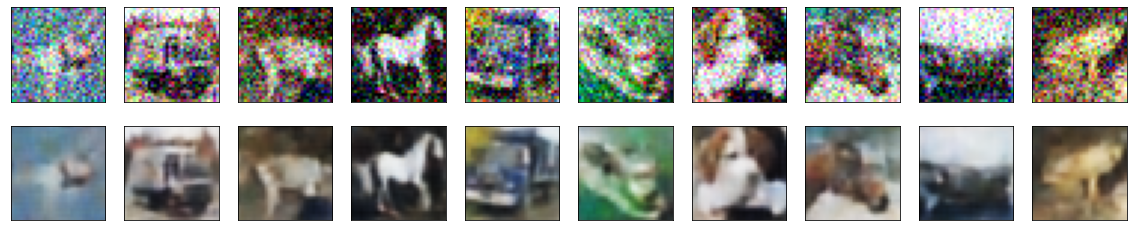

In [33]:
decoded_imgs = autoencoder.predict(x_test_noisy[:100])

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i+10].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+n+1)
    plt.imshow(decoded_imgs[i+10].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Let's try to flatten the data and check if the accuracy increases or not

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((x_train.shape[0], np.prod(x_train.shape[1:])))
x_test = x_test.reshape((x_test.shape[0], np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

In [ ]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 



x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)